In [1]:
# https://colab.research.google.com/
# [1] Instação do pacote skfuzzy
!pip install scikit-fuzzy

# [2] Fuzzificação
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 13.8 MB/s eta 0:00:00


In [2]:
# Criando as variáveis do problema
Qualidade_da_comida = ctrl.Antecedent(np.arange(0,10.1,0.1),'Qualidade_da_comida')
Qualidade_do_servico = ctrl.Antecedent(np.arange(0,10.1,0.1),'Qualidade_do_servico')
Valor_da_gorjeta = ctrl.Consequent(np.arange(0,25.1,0.1),'Valor_da_gorjeta')



In [3]:
# Criando as funções de pertinência para a Qualidade_da_comida
Qualidade_da_comida['Ruim']= fuzz.trimf(Qualidade_da_comida.universe,[0,0,5])
Qualidade_da_comida['Decente']= fuzz.trimf(Qualidade_da_comida.universe,[0,5,10])
Qualidade_da_comida['Excelente']= fuzz.trimf(Qualidade_da_comida.universe,[5,10,10])



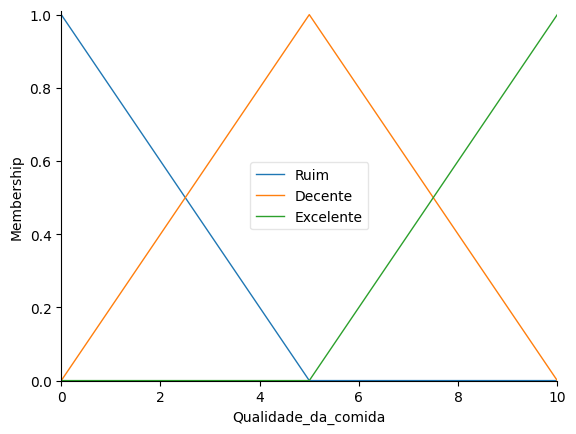

In [4]:
Qualidade_da_comida.view()

In [5]:
# Criando as funções de pertinência para a Qualidade_do_servico
Qualidade_do_servico['Pobre']= fuzz.trimf(Qualidade_do_servico.universe,[0,0,5])
Qualidade_do_servico['Aceitavel']= fuzz.trimf(Qualidade_do_servico.universe,[0,5,10])
Qualidade_do_servico['Incrivel']= fuzz.trimf(Qualidade_do_servico.universe,[5,10,10])



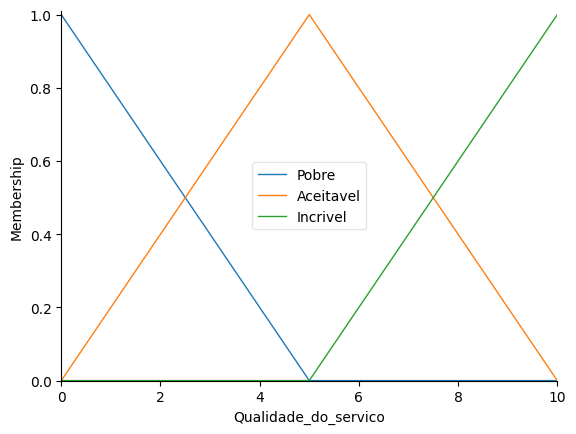

In [6]:
Qualidade_do_servico.view()

In [7]:
# Criando as funções de pertinência para o Valor_da_gorjeta
Valor_da_gorjeta['Baixa']= fuzz.trimf(Valor_da_gorjeta.universe,[0,0,12.5])
Valor_da_gorjeta['Media']= fuzz.trimf(Valor_da_gorjeta.universe,[0,12.5,25])
Valor_da_gorjeta['Alta']= fuzz.trimf(Valor_da_gorjeta.universe,[12.5,25,25])



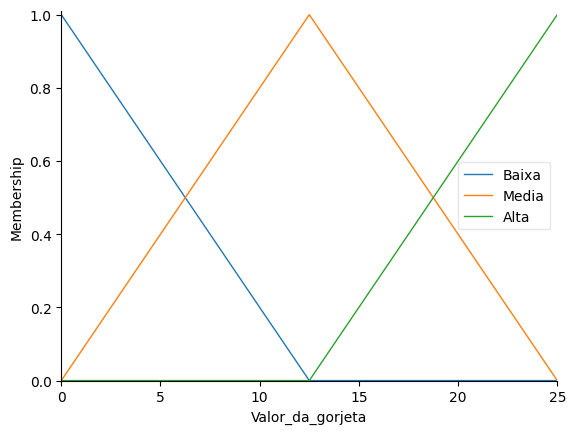

In [8]:
Valor_da_gorjeta.view()

In [9]:
# [3] Inferência Fuzzy e Defuzzificação

# Base de Conhecimento/Regras
rule1 = ctrl.Rule(Qualidade_da_comida['Ruim'] | Qualidade_do_servico['Pobre'],Valor_da_gorjeta['Baixa'])
rule2 = ctrl.Rule(Qualidade_do_servico['Aceitavel'],Valor_da_gorjeta['Media'])
rule3 = ctrl.Rule(Qualidade_da_comida['Excelente'] | Qualidade_do_servico['Incrivel'],Valor_da_gorjeta['Alta'])



In [11]:
# Sistema Fuzzy e Simulação
Valor_da_gorjeta_ctrl = ctrl.ControlSystem([rule1,rule2,rule3])
Valor_da_gorjeta_simulador = ctrl.ControlSystemSimulation(Valor_da_gorjeta_ctrl)




In [12]:
# Entranda da Qualidade_da_comida
while True:
   Qc = float(input('Digite uma nota para Qualidade da comida: '))
   if (Qc<0 or Qc >10):
      print('A nota para Qualidade da comida deve estar no intervalo [0, 10]')
      continue
   Valor_da_gorjeta_simulador.input['Qualidade_da_comida'] = Qc
   break


Digite uma nota para Qualidade da comida: 6.5


In [14]:
# Entranda da Qualidade_do_servico
while True:
   Qs = float(input('Digite uma nota para a Qualidade do servico: '))
   if (Qs<0 or Qs >10):
      print('A nota para Qualidade do serviço deve estar no intervalo [0, 10]')
      continue
   Valor_da_gorjeta_simulador.input['Qualidade_do_servico'] = Qs
   break


Digite uma nota para a Qualidade do servico: 9.8


In [15]:
# Computando o resultado (Inferência Fuzzy + Defuzzificação)
Valor_da_gorjeta_simulador.compute()
print('O Valor da Gorjeta é de %0.2f reais' % Valor_da_gorjeta_simulador.output['Valor_da_gorjeta'])



O Valor da Gorjeta é de 19.76 reais


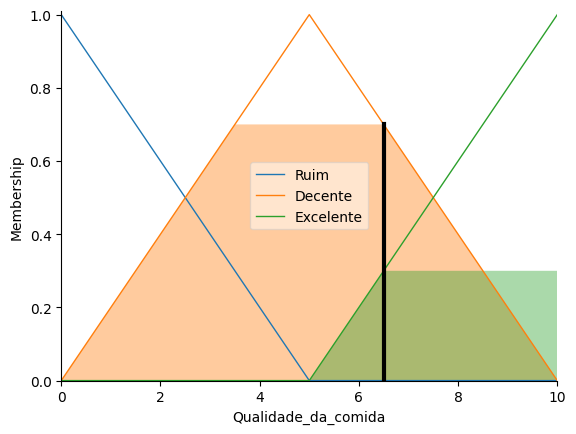

In [17]:
# Visualizando as regiões
Qualidade_da_comida.view(sim=Valor_da_gorjeta_simulador)



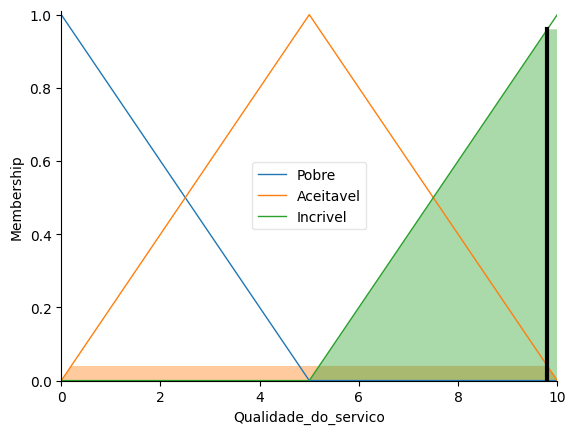

In [18]:
Qualidade_do_servico.view(sim=Valor_da_gorjeta_simulador)

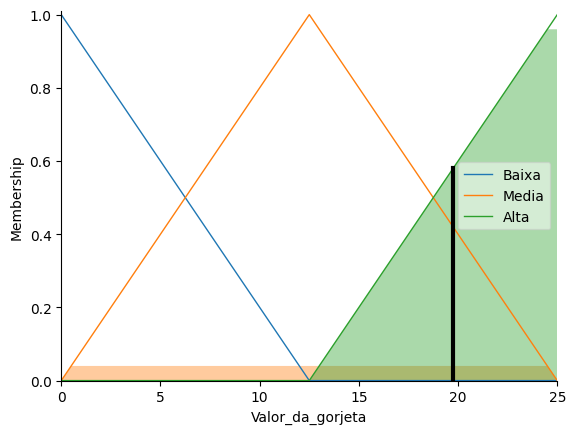

In [19]:
Valor_da_gorjeta.view(sim=Valor_da_gorjeta_simulador)